In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import scipy.io.wavfile as siowav
import cmath
import IPython

# Problem 1

In [2]:
# Defining variables
rollno=224
alpha = 1+np.mod(rollno,4)
print('alpha is equal to '+str(alpha))

alpha is equal to 1


In [3]:
# Defining time frame
t = np.arange(0,10,0.01)
# Time shift
t1 = t-(1.5*alpha)
# Time scaling
t2 = 2*t

# First signal
x = np.exp(-alpha*t)
# Second signal
x1 = np.exp(-alpha*t1)
# Third signal
x2 = np.exp(-alpha*t2)

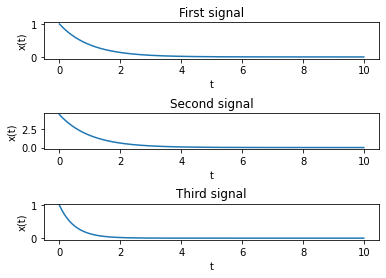

In [4]:
plt.figure()

# Plotting first signal
plt.subplot(311)
plt.title('First signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(t,x)

# Plotting second signal
plt.subplot(312)
plt.title('Second signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(t,x1)

# Plotting third signal
plt.subplot(313)
plt.title('Third signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.plot(t,x2)
plt.subplots_adjust(hspace=1.5)

## Compute continuous fourier transform

In [5]:
# Defining frequency range from 0 to 2pi
big_omega = np.arange(-np.pi,np.pi,(2*np.pi/1000))

# Computing frequency spectrums
j = cmath.sqrt(-1)

# Spectrum of original signal
X = np.zeros_like(big_omega, dtype='complex')
X = 1/(1+j*big_omega)
    
# Spectrum of delayed signal
X1 = np.zeros_like(big_omega, dtype='complex')
X1 = np.exp(1.5)/(1+j*big_omega)
    
# Spectrum of dilated signal
X2 = np.zeros_like(big_omega, dtype='complex')
X2 = 1/(2+j*big_omega)

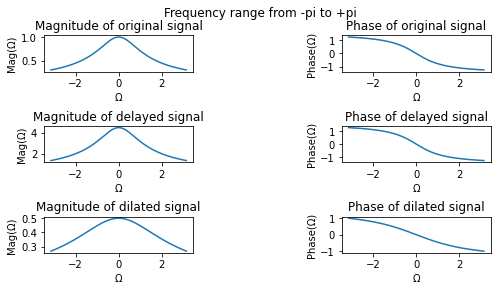

In [6]:
# Plotting spectrums
plt.figure(figsize=(8,4))
plt.suptitle('Frequency range from -pi to +pi')

plt.subplot(321)
plt.plot(big_omega, (abs(X)))
plt.title('Magnitude of original signal')
plt.xlabel('\u03A9')
plt.ylabel('Mag(\u03A9)')

plt.subplot(322)
plt.plot(big_omega, np.angle(X))
plt.title('Phase of original signal')
plt.xlabel('\u03A9')
plt.ylabel('Phase(\u03A9)')

plt.subplot(323)
plt.plot(big_omega, (abs(X1)))
plt.title('Magnitude of delayed signal')
plt.xlabel('\u03A9')
plt.ylabel('Mag(\u03A9)')

plt.subplot(324)
plt.plot(big_omega, np.angle(X1))
plt.title('Phase of delayed signal')
plt.xlabel('\u03A9')
plt.ylabel('Phase(\u03A9)')

plt.subplot(325)
plt.plot(big_omega, (abs(X2)))
plt.title('Magnitude of dilated signal')
plt.xlabel('\u03A9')
plt.ylabel('Mag(\u03A9)')

plt.subplot(326)
plt.plot(big_omega, np.angle(X2))
plt.title('Phase of dilated signal')
plt.xlabel('\u03A9')
plt.ylabel('Phase(\u03A9)')

plt.subplots_adjust(hspace=1.5, wspace=1)
plt.savefig('problem1_plot_signals.png')

# Problem 2

In [7]:
# Defining time frame
t = np.arange(0,5,0.001)

#Defining the tones
tone1 = np.sin(2*np.pi*200*alpha*t)
tone2 = np.sin(2*np.pi*220*alpha*t)

# Appending the signals
appended = np.concatenate((tone1, tone2), axis=0)
print('Length of the signal is '+str(len(appended)))

# Writing the signal into a wavfile
siowav.write('problem2_appended.wav', rate=1000, data = appended.astype(np.float32))

Length of the signal is 10000


In [8]:
# Displaying the signal
IPython.display.Audio(data=appended, rate=1000)

<ipython-input-9-89358bbea061>:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(appended[:100])


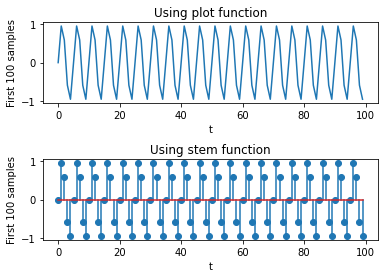

In [9]:
# Plotting first 100 samples
plt.figure()

# Using plot function
plt.subplot(211)
plt.title('Using plot function')
plt.plot(appended[:100])
plt.xlabel('t')
plt.ylabel('First 100 samples')

# Using stem function
plt.subplot(212)
plt.title('Using stem function')
plt.stem(appended[:100])
plt.xlabel('t')
plt.ylabel('First 100 samples')

plt.subplots_adjust(hspace=0.7)
plt.savefig('problem2_plot_stem.png')

# Problem 3

In [10]:
# Reading wavfile
Fs, track = siowav.read('Track001.wav')
IPython.display.Audio(data=track, rate=Fs)

Text(0, 0.5, 'conv')

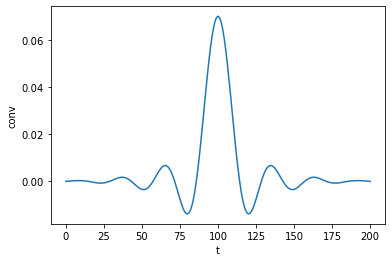

In [11]:
# Reading text file
conv = np.loadtxt('ConvFile1.txt')
plt.plot(conv)
plt.xlabel('t')
plt.ylabel('conv')

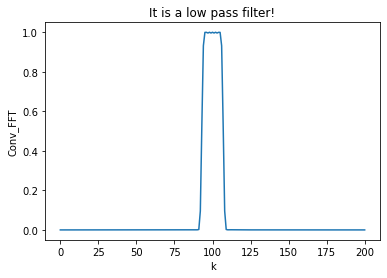

In [12]:
# Checking the magnitude spectrum of the filter
plt.plot(np.fft.fftshift(abs(np.fft.fft(conv))))
plt.title('It is a low pass filter!')
plt.xlabel('k')
plt.ylabel('Conv_FFT')
plt.savefig('conv_fft.png')

In [13]:
# Convolving signal with kernel
convolved = convolve(track, conv, mode='same')
print('The quickly varying sounds, i.e the high frequency components are filtered out. Hence, it is a low pass filter')
IPython.display.Audio(data=convolved, rate=Fs)

The quickly varying sounds, i.e the high frequency components are filtered out. Hence, it is a low pass filter


In [14]:
# Writing to a wavfile
siowav.write('problem3_convolved.wav', rate=44100, data = appended.astype(np.int16))

# Problem 4

Sampling rate is 16000


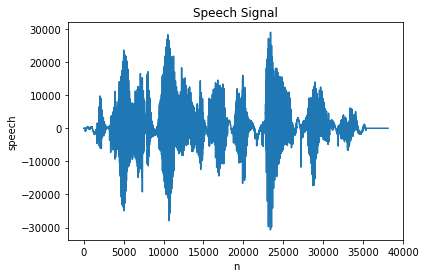

In [15]:
# Importing speech file
Fs, s = siowav.read('speech.wav')
n = np.arange(len(s))
print('Sampling rate is '+str(Fs))
plt.plot(s)
plt.title('Speech Signal')
plt.xlabel('n')
plt.ylabel('speech')
plt.savefig('s(n).png')

In [16]:
# Displaying speech file
IPython.display.Audio(data=s, rate=Fs)

In [17]:
# Defining function for modulation
def modulation(signal, F, Fs):
    y = signal*np.cos(2*np.pi*F*n/Fs)
    return y

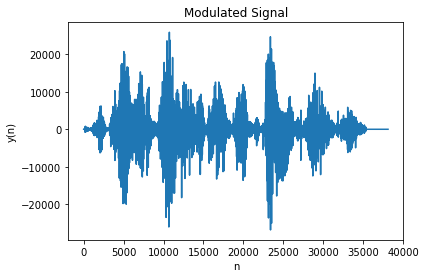

In [18]:
# Computing modulated signal in time domain

F = 500
y = modulation(s, F, Fs)
plt.plot(n, y)
plt.title('Modulated Signal')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.savefig('y(n).png')

In [19]:
# Displaying modulated signal
IPython.display.Audio(data=y, rate=Fs)

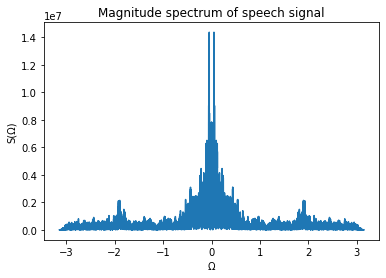

In [20]:
# Computing frequency spectrum of speech signal
t = np.arange(len(s))
big_omega = np.arange(0,2*np.pi,2*np.pi/len(s))
big_omega_shifted = np.arange(-np.pi,np.pi,2*np.pi/len(s))
j = cmath.sqrt(-1)
S = np.zeros_like(big_omega, dtype='complex')
for i in range(len(big_omega)):
    S[i] = np.sum(s*np.exp(-j*big_omega[i]*t))
    
# Plotting magnitude spectrum of speech signal
plt.plot(big_omega_shifted, np.fft.fftshift(abs(S)))
plt.title('Magnitude spectrum of speech signal')
plt.xlabel('\u03A9')
plt.ylabel('S(\u03A9)')

plt.savefig('S(omega).png')

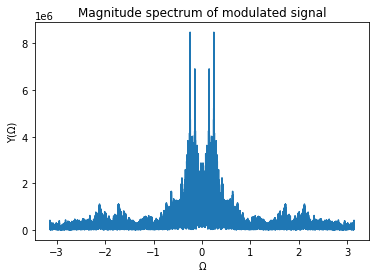

In [21]:
# Computing frequency spectrum of modulated signal
Y = np.zeros_like(big_omega, dtype='complex')
for i in range(len(big_omega)):
    Y[i] = np.sum(y*np.exp(-j*big_omega[i]*t))
    
# Plotting magnitude spectrum of modulated signal
plt.plot(big_omega_shifted, np.fft.fftshift(abs(Y)))
plt.title('Magnitude spectrum of modulated signal')
plt.xlabel('\u03A9')
plt.ylabel('Y(\u03A9)')
plt.savefig('Y(omega).png')

## Computing modulated signal from the frequency spectrum of the speech signal

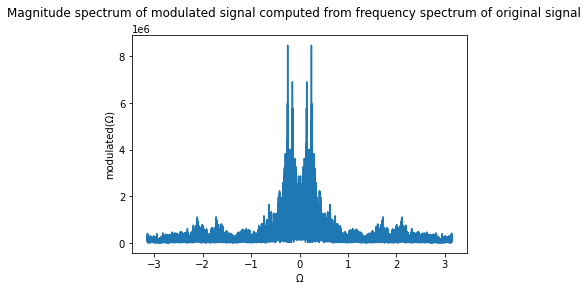

In [22]:
# Right Shift in frequency
big_omega1 = big_omega+(2*np.pi*F/Fs)
# Left Shift in frequency
big_omega2 = big_omega-(2*np.pi*F/Fs)

# Right shifted component
S1 = np.zeros_like(big_omega, dtype='complex')
for i in range(len(big_omega)):
    S1[i] = np.sum(s*np.exp(-j*big_omega1[i]*t))
    
# Left shifted component
S2 = np.zeros_like(big_omega, dtype='complex')
for i in range(len(big_omega)):
    S2[i] = np.sum(s*np.exp(-j*big_omega2[i]*t))
    
# Modulated signal
modulated = (S1+S2)/2

# Plotting magnitude spectrum of modulated signal
plt.plot(big_omega_shifted, np.fft.fftshift(abs(modulated)))
plt.suptitle('Magnitude spectrum of modulated signal computed from frequency spectrum of original signal')
plt.xlabel('\u03A9')
plt.ylabel('modulated(\u03A9)')
plt.savefig('modulated(omega).png')

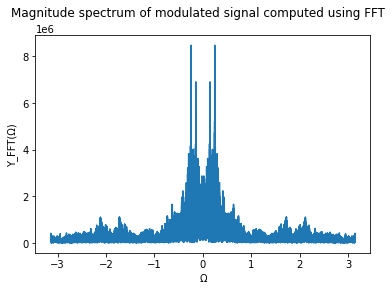

In [23]:
# Computing frequency spectrum of modulated signal using fast fourier transform
Y_fft = np.fft.fft(y)

# Plotting the magnitude spectrum obtained using FFT
plt.plot(big_omega_shifted, np.fft.fftshift(abs(Y_fft)))
plt.suptitle('Magnitude spectrum of modulated signal computed using FFT')
plt.xlabel('\u03A9')
plt.ylabel('Y_FFT(\u03A9)')
plt.savefig('Y_fft(omega).png')

In [24]:
# Computing squared error between the computed modulation and FFT
squared_error = np.linalg.norm(Y_fft-modulated)
print('The squared error between the two signals is '+str(squared_error))
print('Hence, our computation of the modulated signal in the frequency domain is accurate upto an error of 10e-3 in Euclidian norm.')

The squared error between the two signals is 0.0010001214625722753
Hence, our computation of the modulated signal in the frequency domain is accurate upto an error of 10e-3 in Euclidian norm.
